In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read the csv file
df_train = pd.read_csv('SalaryData_Train(1).csv')
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [5]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [4]:
df_test = pd.read_csv('SalaryData_Test(1).csv')
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [6]:
df_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

## EDA

In [7]:
df_train.shape

(30161, 14)

In [8]:
df_test.shape

(15060, 14)

In [9]:
df_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [10]:
df_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
df_test[df_test.duplicated()]

age workclass      education  educationno        maritalstatus  \
551     59   Private        HS-grad            9             Divorced   
601     32   Private        HS-grad            9   Married-civ-spouse   
681     40   Private        HS-grad            9   Married-civ-spouse   
799     24   Private      Bachelors           13        Never-married   
1044    44   Private    Prof-school           15   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
551         Other-service   Not-in-family   White   Female            0   
601                 Sales         Husband   White     Male            0   
681          Craft-repair         Husband   White     Male            0   
799        Prof-specialty   Not-in-family   White     Male            0   
1044       Prof-specialty         Husband   White     Male        99999   
...                   ...             ...     ...      ...          ...   
15043        Craft-repair         Husband   White     Male            0   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
551              0            40   United-States   <=50K  
601              0            40   United-States   <=50K  
681              0            40   United-States   <=50K  
799              0            35   United-States   <=50K  
1044             0            60   United-States    >50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[930 rows x 14 columns]

In [14]:
df_test = df_test.drop_duplicates()

In [15]:
df_test.duplicated().sum()

0

In [16]:
df_train[df_train.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
30110   47   Private        HS-grad            9   Married-civ-spouse   
30118   20   Private        HS-grad            9        Never-married   
30132   22   Private   Some-college           10        Never-married   
30157   40   Private        HS-grad            9   Married-civ-spouse   
30159   22   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
30110        Craft-repair         Husband   White     Male            0   
30118   Machine-op-inspct       Own-child   White     Male            0   
30132        Adm-clerical       Own-child   White     Male            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30159        Adm-clerical       Own-child   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
30110            0            40   United-States   <=50K  
30118            0            40   United-States   <=50K  
30132            0            40   United-States   <=50K  
30157            0            40   United-States    >50K  
30159            0            20   United-States   <=50K  

[3258 rows x 14 columns]

In [17]:
df_train = df_train.drop_duplicates()

In [18]:
df_train.duplicated().sum()

0

## Encoding

In [19]:
import category_encoders as ce

In [20]:
Ordinal = ce.OrdinalEncoder(cols = ['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native' ])
Ordinal

OrdinalEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation',
                     'relationship', 'race', 'sex', 'native'])

In [21]:
df1_test = Ordinal.fit_transform(df_test)

In [22]:
df1_test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          1          1            7              1           1   
1   38          1          2            9              2           2   
2   28          2          3           12              2           3   
3   44          1          4           10              2           1   
4   34          1          5            6              1           4   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     1    1            0            0            40       1   
1             2     2    1            0            0            50       1   
2             2     2    1            0            0            40       1   
3             2     1    1         7688            0            40       1   
4             3     2    1            0            0            30       1   

   Salary  
0   <=50K  
1   <=50K  
2    >50K  
3    >50K  
4   <=50K

In [23]:
df1_train = Ordinal.fit_transform(df_train)

In [24]:
df1_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          1          1           13              1           1   
1   50          2          1           13              2           2   
2   38          3          2            9              3           3   
3   53          3          3            7              2           3   
4   28          3          1           13              2           4   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     1    1         2174            0            40       1   
1             2     1    1            0            0            13       1   
2             1     1    1            0            0            40       1   
3             2     2    1            0            0            40       1   
4             3     2    2            0            0            40       2   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K

## Visualization

<AxesSubplot:xlabel='Salary', ylabel='count'>

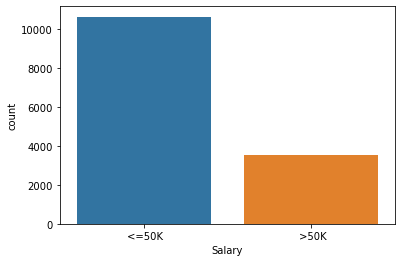

In [26]:
sns.countplot(df1_test['Salary'])

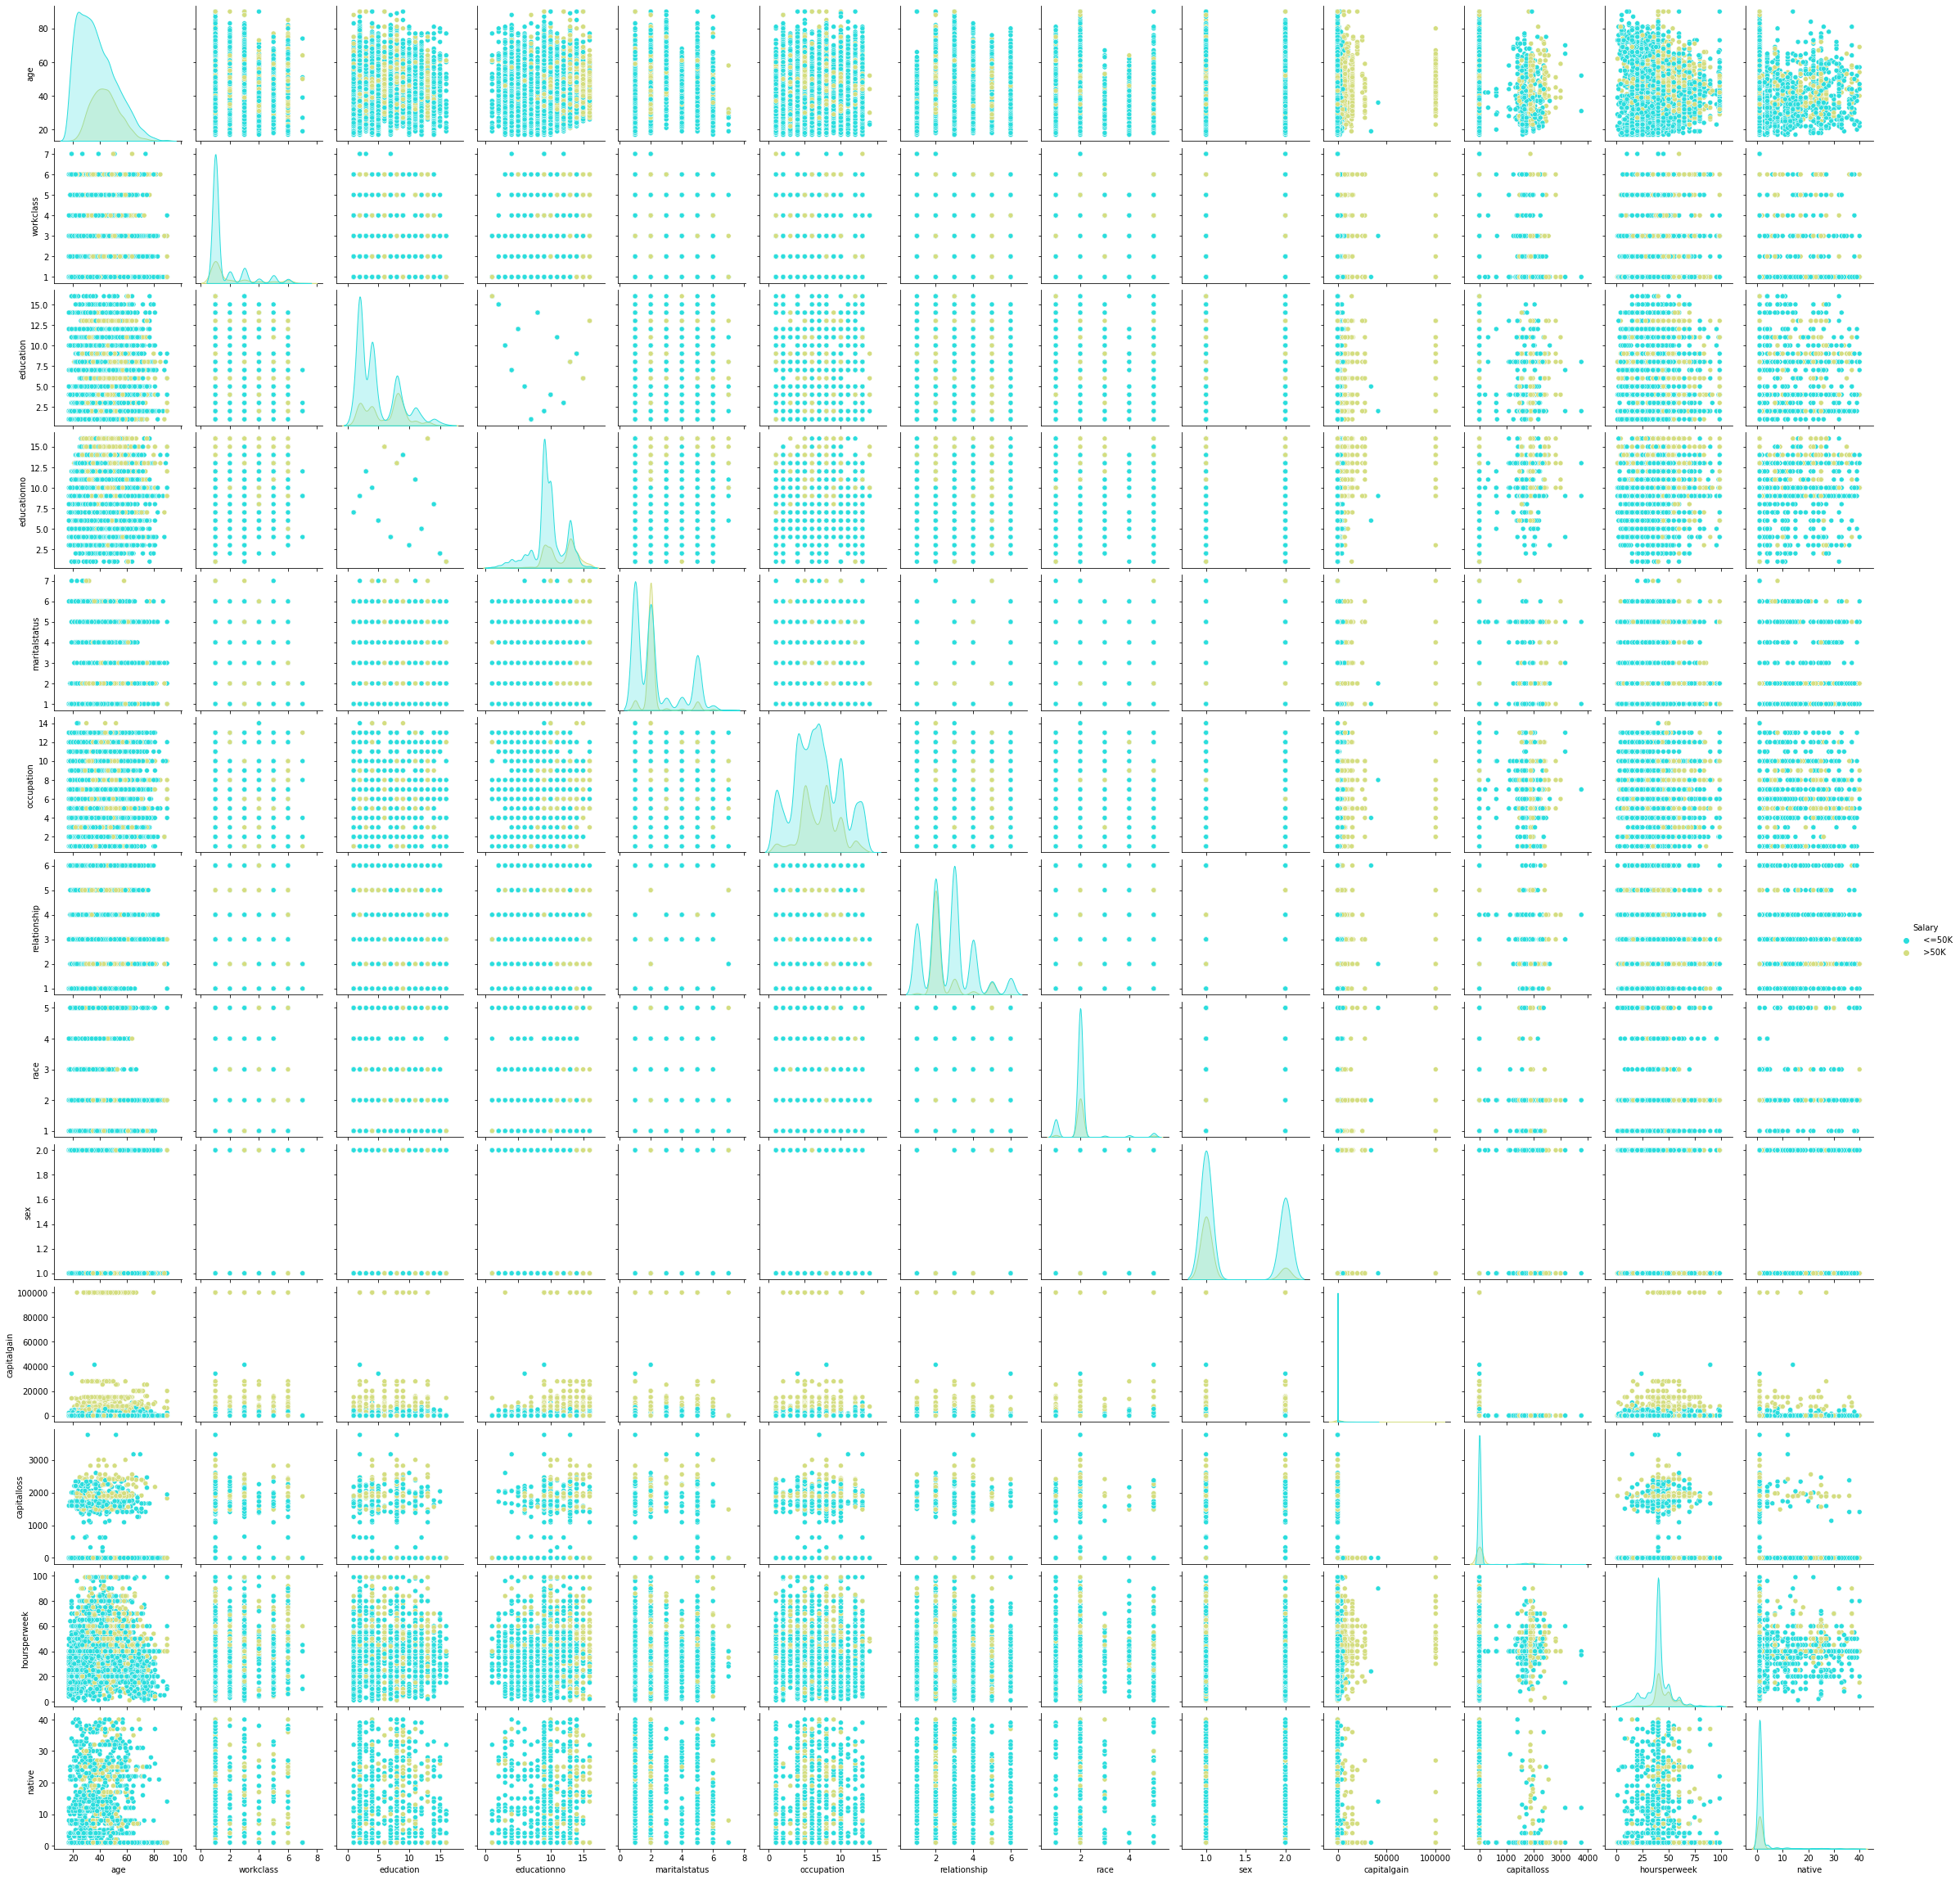

In [27]:
sns.pairplot(df1_test,hue= 'Salary', palette= 'rainbow')

<AxesSubplot:xlabel='Salary', ylabel='count'>

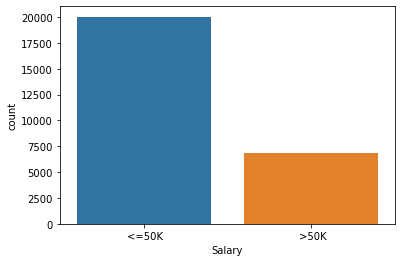

In [28]:
sns.countplot(df1_train['Salary'])

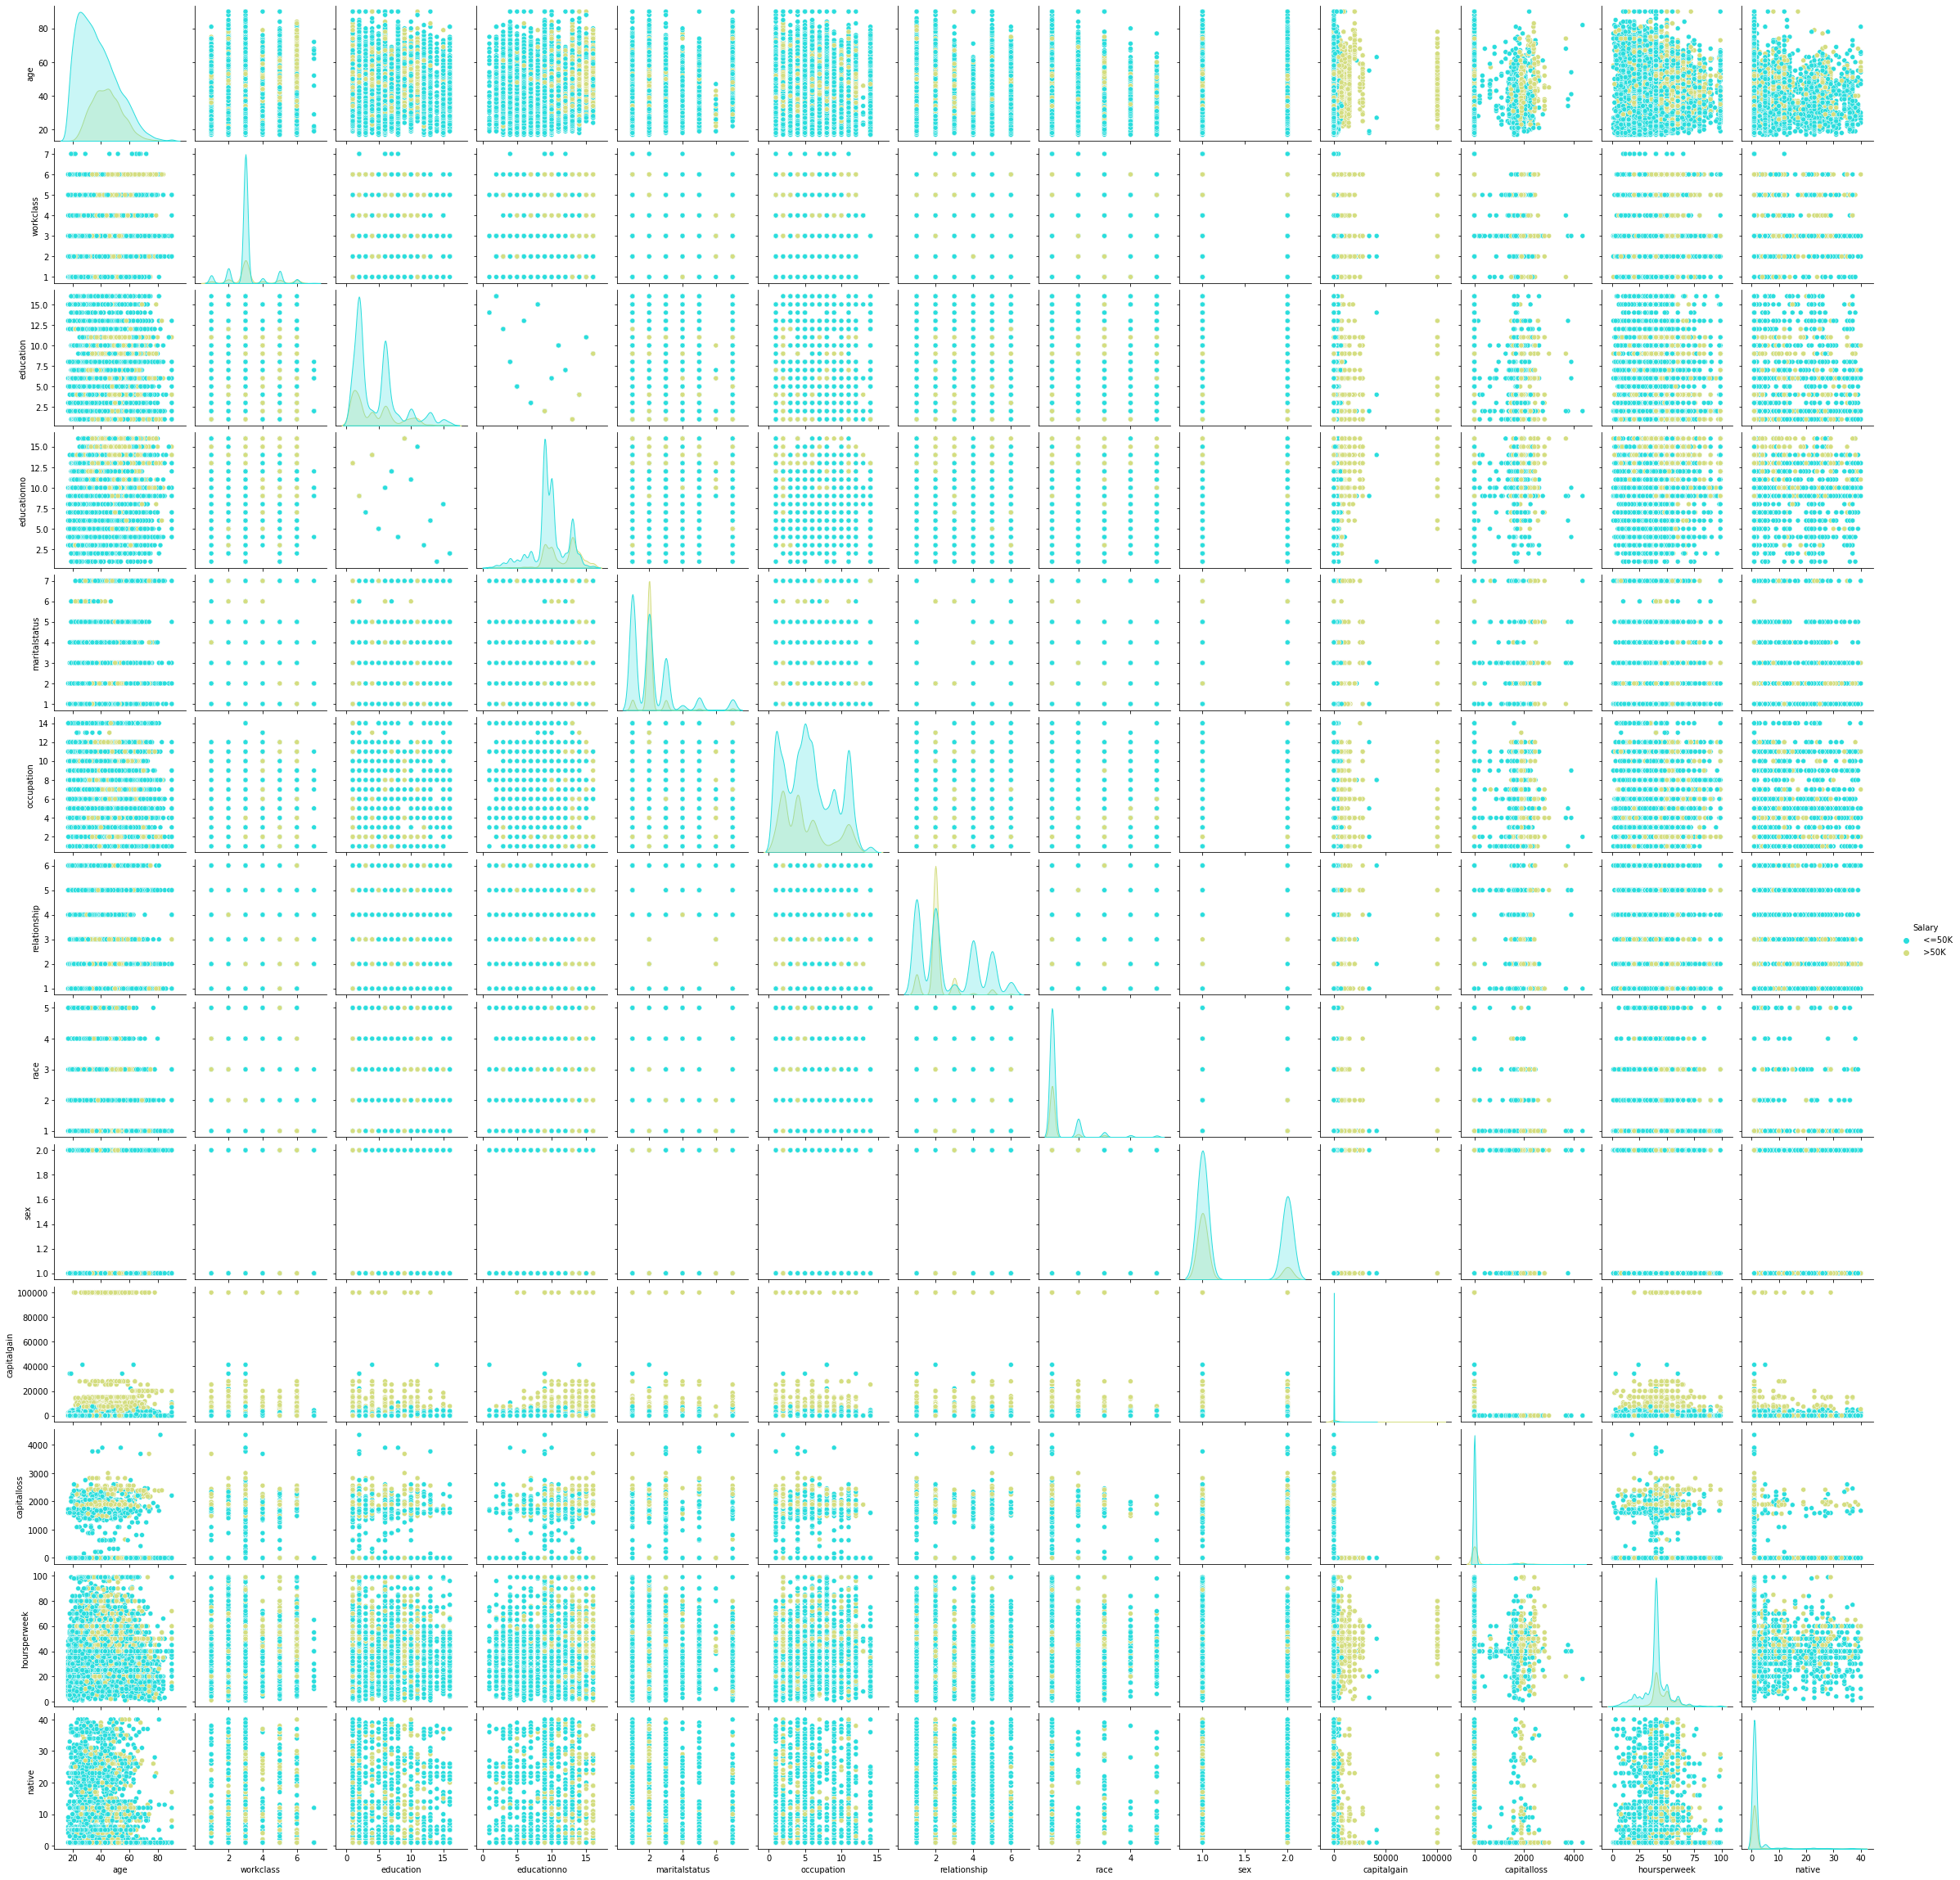

In [29]:
sns.pairplot(df1_train, hue = 'Salary', palette = 'rainbow')

## Feature Scaling

In [30]:
sc = StandardScaler()

In [31]:
x_test = df1_test.iloc[:,:-1]
y_test = df1_test['Salary']

In [32]:
x_train = df1_train.iloc[:,:-1]
y_train = df1_train['Salary']

In [34]:
x_test = sc.fit_transform(x_test)
x_test

array([[-1.05408752, -0.53150638, -1.21353737, ..., -0.22610763,
        -0.08753833, -0.24641927],
       [-0.08603828, -0.53150638, -0.92045148, ..., -0.22610763,
         0.72761694, -0.24641927],
       [-0.83069154,  0.18525113, -0.62736559, ..., -0.22610763,
        -0.08753833, -0.24641927],
       ...,
       [-0.08603828, -0.53150638,  0.83806386, ..., -0.22610763,
         0.72761694, -0.24641927],
       [ 0.36075367, -0.53150638,  0.83806386, ..., -0.22610763,
        -0.08753833, -0.24641927],
       [-0.30943426,  3.05228114,  0.83806386, ..., -0.22610763,
         1.54277221, -0.24641927]])

In [35]:
x_train = sc.fit_transform(x_train)
x_train

array([[-0.00372591, -2.16855628, -1.00191342, ..., -0.23132996,
        -0.09432316, -0.25369404],
       [ 0.83032903, -1.14555623, -1.00191342, ..., -0.23132996,
        -2.28112073, -0.25369404],
       [-0.07954909, -0.12255619, -0.71979757, ..., -0.23132996,
        -0.09432316, -0.25369404],
       ...,
       [-0.91360403, -0.12255619,  0.69078168, ..., -0.23132996,
        -0.25630817, -0.25369404],
       [ 1.43691444, -0.12255619, -0.71979757, ..., -0.23132996,
        -0.09432316, -0.25369404],
       [ 0.98197538,  2.94644395, -0.71979757, ..., -0.23132996,
        -0.09432316, -0.25369404]])

## Model Building

In [36]:
svc = SVC(kernel= 'poly')
svc.fit(x_train,y_train)

ypred = svc.predict(x_test)

print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.8225848418392001
0.8043878273177636


* Since the model accuracy is good, there is no need of hyper parameter tuning